In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.special import expit as axpit

np.random.seed(0)

data = scipy.io.loadmat('data.mat')

In [51]:
#Question 5.1
X, Y = np.meshgrid(np.linspace(-6, 6, 1000), np.linspace(-6, 6, 1000))

half = (np.abs(X)**0.5 + np.abs(Y)**0.5)**2

one = np.abs(X) + np.abs(Y)

two = np.sqrt(X**2 + Y**2)

plt.show()

Text(0.5, 1.0, 'half')

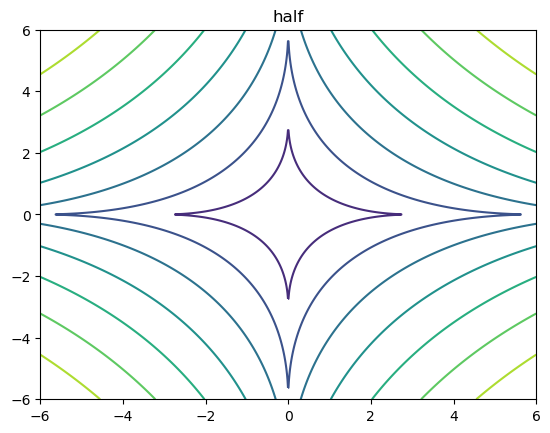

In [52]:
plt.contour(X, Y, half)
plt.title("half")

Text(0.5, 1.0, 'one')

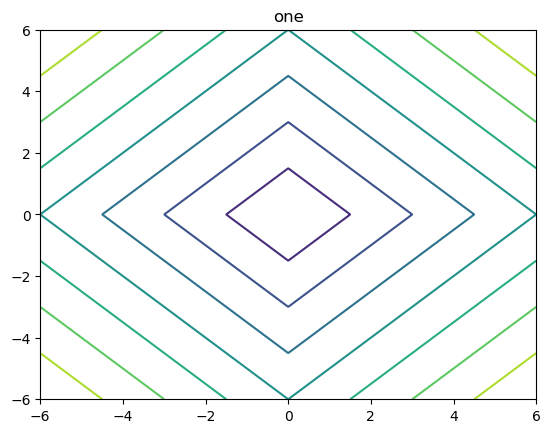

In [53]:
plt.contour(X, Y, one)
plt.title("one")

Text(0.5, 1.0, 'two')

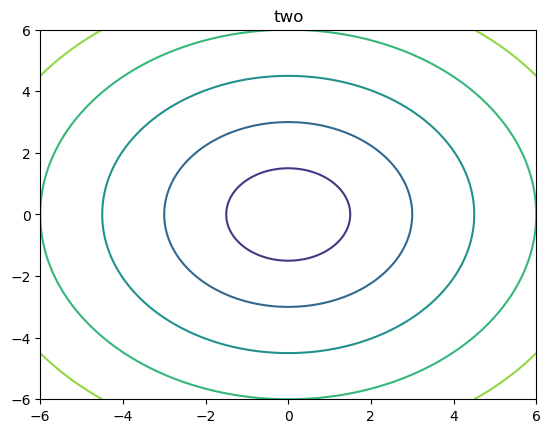

In [54]:
plt.contour(X, Y, two)
plt.title("two")

0.2117175807296077


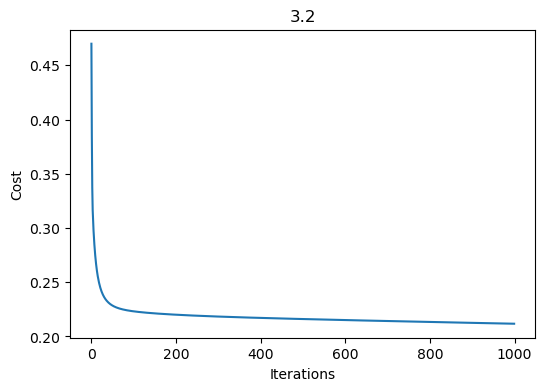

In [48]:
#Question 3.2
def gradient_descent(data_matrix, target_vector, regularization, learning_rate, iterations):
    num_samples, num_features = data_matrix.shape
    zero = np.zeros(num_features) #weights matrix
    costs = np.zeros(iterations)

    for i in range(0,iterations):
        hypothesis = axpit(data_matrix.dot(zero))
        gradient = (1 / num_samples) * data_matrix.T.dot(hypothesis - target_vector) + (regularization/len(data_matrix)) * np.hstack(([0], zero[1:]))
        zero -= learning_rate * gradient
        costs[i] = (-1/len(data_matrix)) * (target_vector.dot(np.log(axpit(data_matrix.dot(zero)))) + (1 - target_vector).dot(np.log(1 - axpit(data_matrix.dot(zero)))))

    return costs

data = scipy.io.loadmat('data.mat')

#print(data.keys())

x_data = data['X']
y_data = data['y']
y_data = y_data.flatten()

mean = np.mean(x_data)
std_deviation = np.std(x_data)

x_norm = (x_data - mean) / std_deviation
x_norm = np.hstack((x_norm, np.ones((x_norm.shape[0], 1))))

costs = gradient_descent(x_norm, y_data, 0.1, 1, 1000)
print(costs[costs.size - 1])

plt.figure(figsize=(6, 4))
plt.plot(range(1000), costs)
plt.title('3.2')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

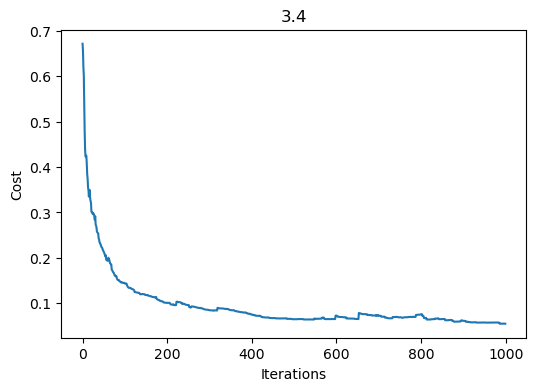

In [44]:
#Question 3.4
def gradient_descent_stochastic(data_matrix, target_vector, learn, regularization, iterations):
    num_samples, num_features = data_matrix.shape
    zero = np.zeros(num_features)
    costs = np.zeros(iterations)

    for i in range(iterations):
        sample_idx = np.random.randint(num_samples)
        X_i = data_matrix[sample_idx, :].reshape(1, -1)
        y_i = target_vector[sample_idx].reshape(-1)

        hypothesis = axpit(X_i.dot(zero))
        gradient = X_i.T.dot(hypothesis - y_i) + regularization * np.hstack(([0], zero[1:]))
        zero -= learn * gradient

        costs[i] = (-1/len(data_matrix)) * (target_vector.dot(np.log(axpit(data_matrix.dot(zero)))) + (1 - target_vector).dot(np.log(1 - axpit(data_matrix.dot(zero)))))

    return costs


dataMat = scipy.io.loadmat('data.mat')

x_data = data['X']
y_data = data['y']
y_data = y_data.flatten()

mean = np.mean(x_data, axis = 0)
std_deviation = np.std(x_data, axis = 0)

x_norm = (x_data - mean) / std_deviation

x_norm = np.hstack((np.ones((x_norm.shape[0], 1)), x_norm))

costs = gradient_descent_stochastic(x_norm, y_data, 0.1, 0.01, 1000)
#print(costs[costs.size - 1])

plt.figure(figsize=(6, 4))
plt.plot(range(1000), costs)
plt.title('3.4')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

0.03134023293037328


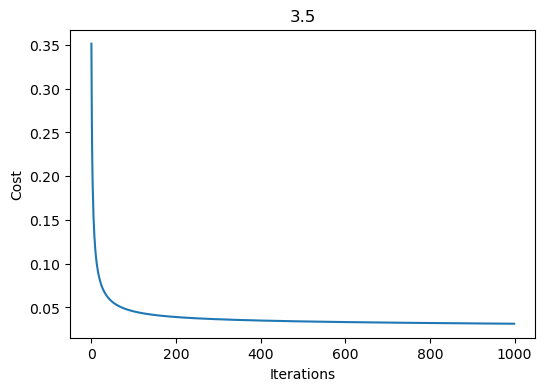

In [3]:
#Question 3.5
def cost(x, y, weights, regularization):
    len_y = len(y)
    sigma = axpit(x.dot(weights))
    return (-1/len_y) * (y.dot(np.log(sigma)) + (1 - y).dot(np.log(1 - sigma)))


def step_grad(data_matrix, target_vector, regularization, learning_rate, iterations):
    num_samples, num_features = data_matrix.shape
    zero = np.zeros(num_features) #weights matrix
    costs = np.zeros(iterations)

    for i in range(0,iterations):
        hypothesis = axpit(data_matrix.dot(zero))
        gradient = (1 / num_samples) * data_matrix.T.dot(hypothesis - target_vector) + (regularization/len(data_matrix)) * np.hstack(([0], zero[1:]))
        zero -= learning_rate * gradient
        costs[i] = (-1/len(data_matrix)) * (target_vector.dot(np.log(axpit(data_matrix.dot(zero)))) + (1 - target_vector).dot(np.log(1 - axpit(data_matrix.dot(zero)))))

    return costs


data = scipy.io.loadmat('data.mat')

x_data = data['X']
y_data = data['y']
y_data = y_data.flatten()

mean = np.mean(x_data, axis = 0)
std_deviation = np.std(x_data, axis = 0)

x_norm = (x_data - mean) / std_deviation

x_norm = np.hstack((np.ones((x_norm.shape[0], 1)), x_norm))

costs = step_grad(x_norm, y_data, 1, 1, 1000)
print(costs[costs.size - 1])

plt.figure(figsize=(6, 4))
plt.plot(range(1000), costs)
plt.title('3.5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [46]:
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [49]:
#Question 3.6
def cost(x, y, weights, regularization):
    len_y = len(y)
    sigma = axpit(x.dot(weights))
    return (-1/len_y) * (y.dot(np.log(sigma)) + (1 - y).dot(np.log(1 - sigma)))


def gradient_descent(data_matrix, target_vector, regularization, learning_rate, iterations):
    num_samples, num_features = data_matrix.shape
    zero = np.zeros(num_features) #weights matrix
    costs = np.zeros(iterations)

    for i in range(0,iterations):
        hypothesis = axpit(data_matrix.dot(zero))
        gradient = (1 / num_samples) * data_matrix.T.dot(hypothesis - target_vector) + (regularization/len(data_matrix)) * np.hstack(([0], zero[1:]))
        zero -= learning_rate * gradient
        costs[i] = (-1/len(data_matrix)) * (target_vector.dot(np.log(axpit(data_matrix.dot(zero)))) + (1 - target_vector).dot(np.log(1 - axpit(data_matrix.dot(zero)))))

    return costs, zero


dataMat = scipy.io.loadmat('data.mat')

x_data = data['X']
y_data = data['y']
y_data = y_data
y_data = y_data.flatten()

mean = np.mean(x_data, axis = 0)
std_deviation = np.std(x_data, axis = 0)

x_norm = (x_data - mean) / std_deviation

x_norm = np.hstack((np.ones((x_norm.shape[0], 1)), x_norm))

x_training_set = x_norm
y_training_set = y_data

costs, weights = gradient_descent(x_training_set, y_training_set, 0.1, 1, 5000)

test_data = (data['X_test'] - mean) / std_deviation
test_data = np.hstack((np.ones((test_data.shape[0], 1)), test_data))
probabilities = axpit(test_data.dot(weights))
predictions = (probabilities >= 0.5).astype(int)

results_to_csv(predictions)